- Income: Einkommen des Kunden (in USD)
- Limit: Verfügbares Kreditkarten-Limit des Kunden
- Rating: Bewertung Kreditwürdigkeit
- Cards: Anzahl der Kreditkarten des Kunden
- Age: Alter (Jahre)
- Education: Bildungslevel des Kunden (in Anzahl der Ausbildungsjahre)
- Gender: Geschlecht des Kunden (male / female)
- Student: Student (True / False)
- Married: Verheiratet (True / False)
- Ethnicity: Ethnische Herkunft des Kunden
- Balance: Kreditkarten-Rechnung des Kunden (monatlicher Mittelwert)

## 1

In [1]:
import csv
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import missingno
import seaborn as sns

dateiname="credit.csv"
data=pd.read_csv(dateiname)
# erste Datensätze
display(data.head())

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## 2

In [2]:
print(f'Es gibt {data.shape[0]} Zeilen und {data.shape[1]} Spalten im Datensatz ')

Es gibt 409 Zeilen und 11 Spalten im Datensatz 


In [3]:
for col in data.columns:
    missing_data = data[col].isnull().sum()
    print(f'{col} - {missing_data :}')

Income - 0
Limit - 0
Rating - 0
Cards - 0
Age - 0
Education - 0
Gender - 0
Student - 0
Married - 0
Ethnicity - 0
Balance - 0


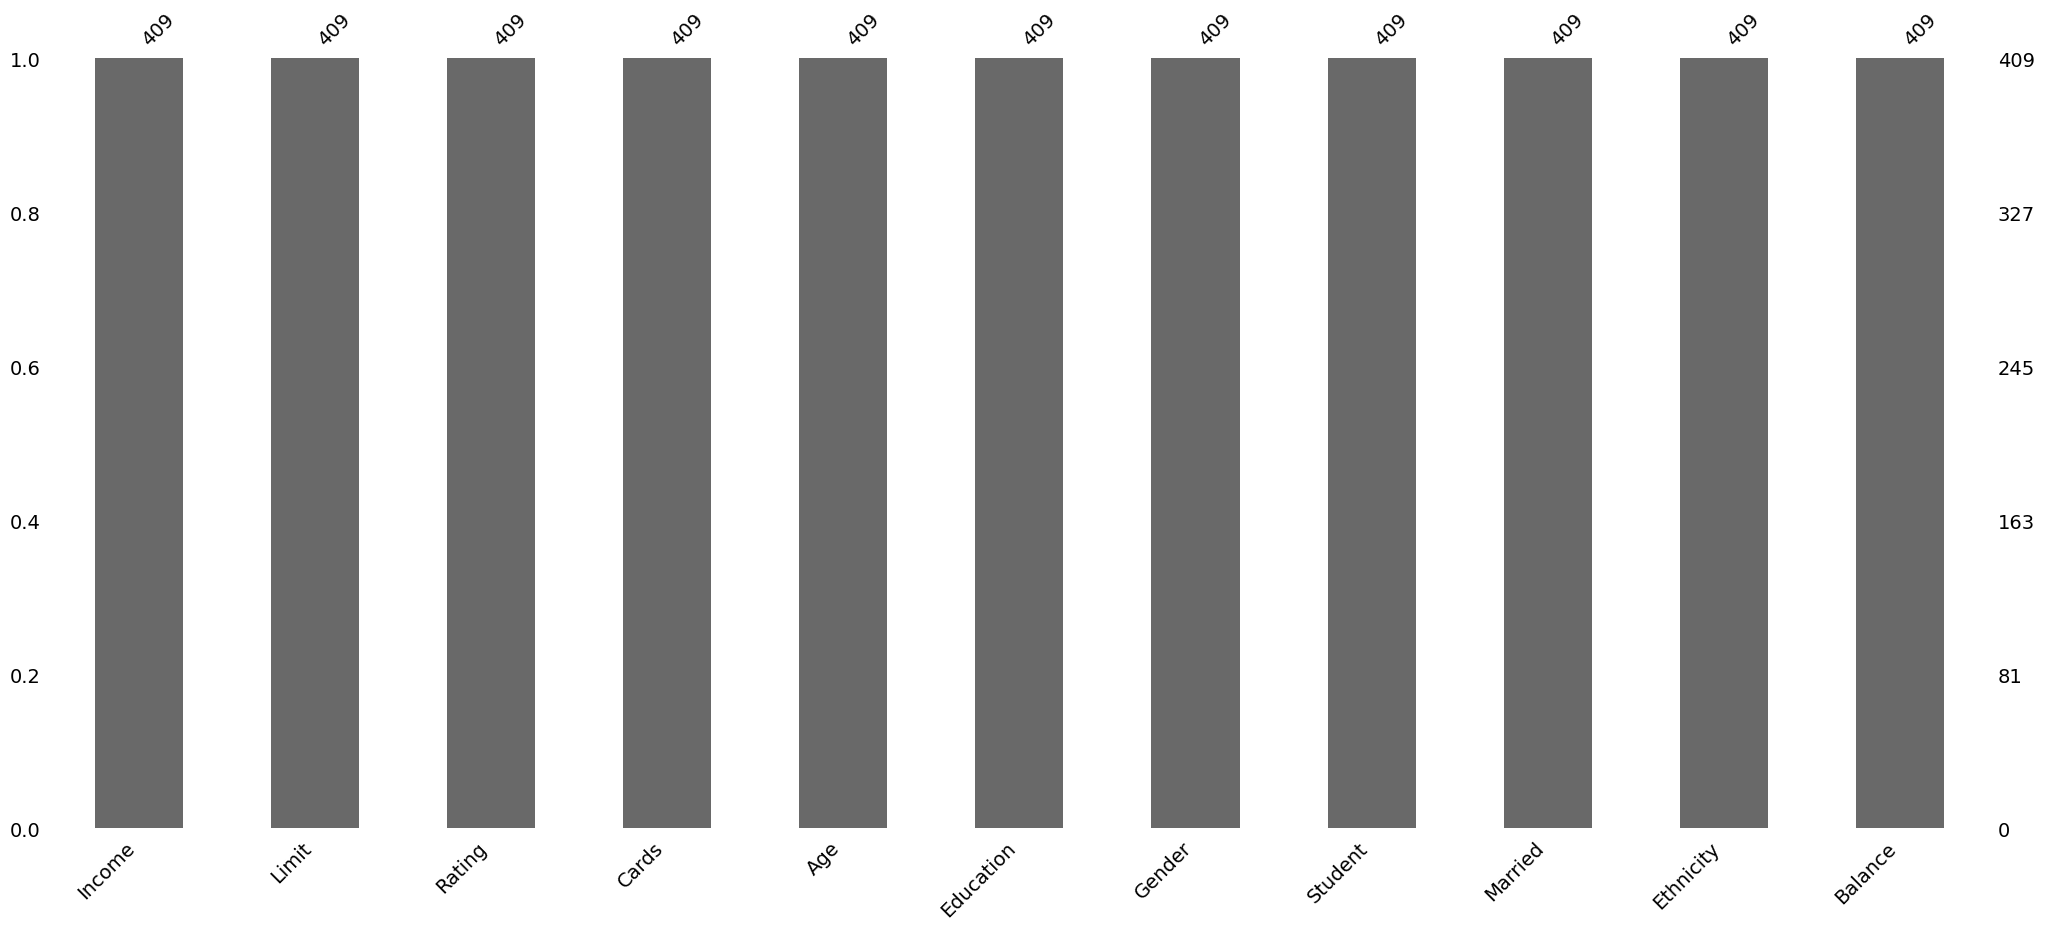

In [4]:
missingno.bar(data, fontsize = 14)
plt.show()

Sind halt alle da? -> keine fehlenden Daten

In [5]:
print(data.duplicated().sum())

9


-> 9 Duplikate

## 3

In [6]:
data_clean= data.drop_duplicates()
data_clean.shape

(400, 11)

## 4

In [7]:
# std heißt wohl standard deviation
# mean ist arithmetisches Mittel
# 50% ist Median
data_clean.describe()
    

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


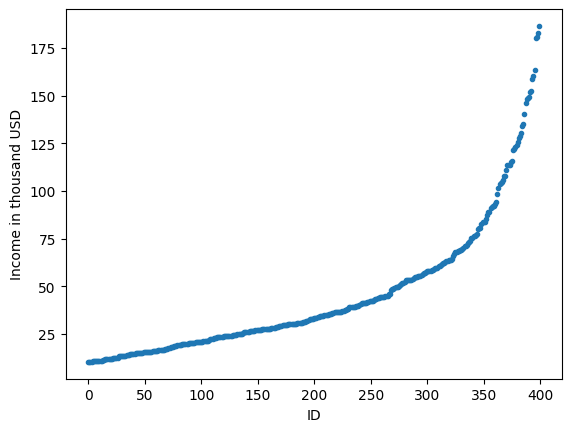

In [8]:
ypoints = data_clean['Income'].sort_values().to_list()
xpoints = range(np.size(ypoints))
plt.scatter(xpoints, ypoints, marker=".")
plt.xlabel("ID")
plt.ylabel("Income in thousand USD")
plt.show()

C:\Users\georg\AppData\Local\Temp\ipykernel_3968\1947466266.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_clean['Balance'])


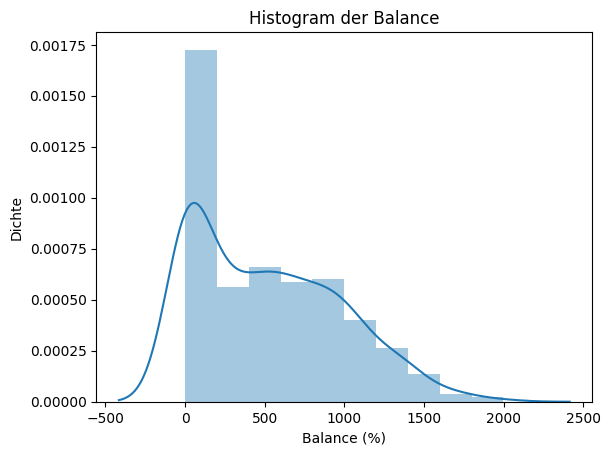

In [9]:
plt.title('Histogram der Balance')
sns.distplot(data_clean['Balance'])
plt.xlabel('Balance (%)')
plt.ylabel('Dichte')
plt.show()

In [10]:
i=0
for col in data_clean['Balance']:
    if (col == 0):
        i+=1
print(f'{i/data_clean.shape[0]}')

0.225


-> Viele Leute benutzen ihre Kreditkarte nicht
-> vielleicht sollte man die bei weiteren Betrachtungen auslassen

In [11]:
datac_balance = data_clean[data_clean['Balance'] > 25]
print(datac_balance.shape)

(306, 11)


## 5

### Balance vs Limit

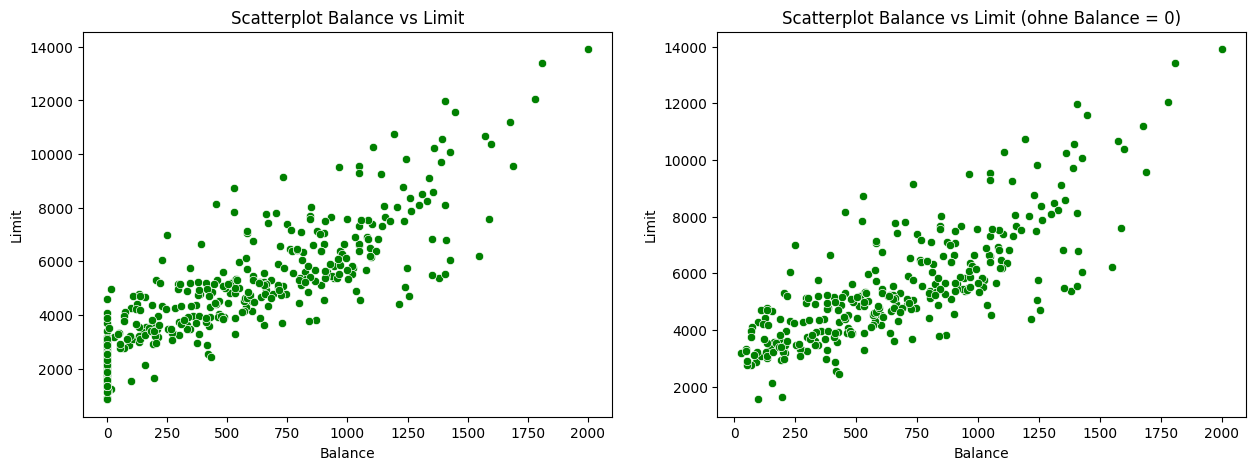

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=data_clean, x=data_clean['Balance'], y=data_clean['Limit'], marker='o', color='green')

plt.title('Scatterplot Balance vs Limit')
plt.xlabel('Balance')
plt.ylabel('Limit')

plt.subplot(1,2,2)
sns.scatterplot(data=datac_balance, x=datac_balance['Balance'], y=datac_balance['Limit'], marker='o', color='green')

plt.title('Scatterplot Balance vs Limit (ohne Balance = 0)')
plt.xlabel('Balance')
plt.ylabel('Limit')

plt.show()

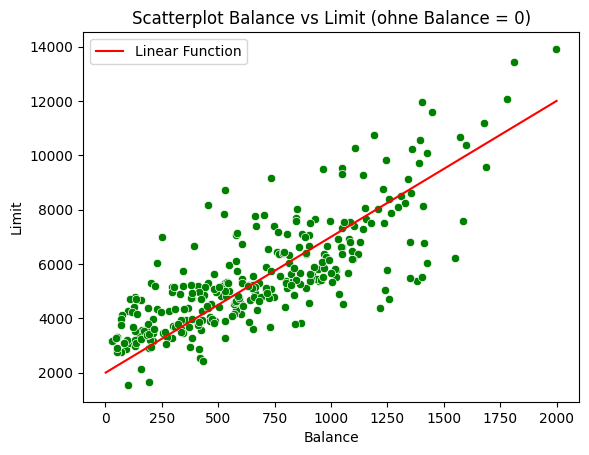

In [13]:
sns.scatterplot(data=datac_balance, x=datac_balance['Balance'], y=datac_balance['Limit'], marker='o', color='green')
def linear_function(x):
    return 5* x + 2000
x_range = np.linspace(1, 2000, 20)
y_function = linear_function(x_range)
plt.title('Scatterplot Balance vs Limit (ohne Balance = 0)')
plt.xlabel('Balance')
plt.ylabel('Limit')
plt.plot(x_range, y_function, label='Linear Function', color='red')
plt.legend()
plt.show()

In [14]:
covariance =datac_balance['Balance'].cov(datac_balance['Limit'])
print("Covariance cov(x,y) =", covariance)

Covariance cov(x,y) = 660521.047144541


In [15]:
correlation_coefficient = datac_balance['Balance'].corr(datac_balance['Limit'])

print("Correlation Coefficient R =", correlation_coefficient)

Correlation Coefficient R = 0.7933085976723969


### Balance in Abhängigkeit zu Gender

In [16]:
datac_balance['Gender'].unique()

array([' Male', 'Female'], dtype=object)

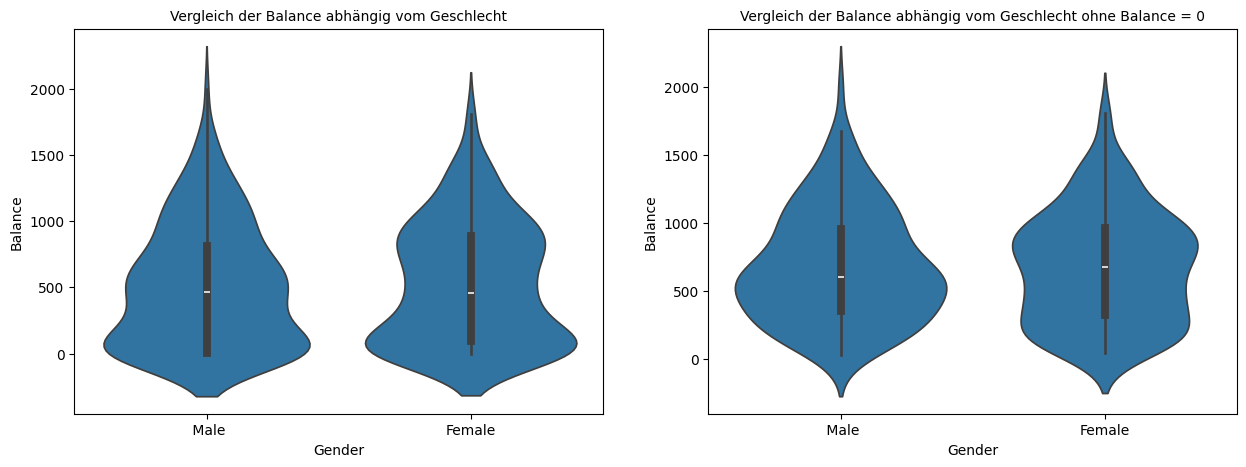

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.violinplot(x=data_clean["Gender"],y=data_clean["Balance"])
plt.title("Vergleich der Balance abhängig vom Geschlecht",fontsize=10)

plt.subplot(1,2,2)
sns.violinplot(x=datac_balance["Gender"],y=datac_balance["Balance"])
plt.title("Vergleich der Balance abhängig vom Geschlecht ohne Balance = 0",fontsize=10)
plt.show()

In [23]:
# ohne Balance = 0
data_gender_male = datac_balance[datac_balance['Gender'] == ' Male']
data_gender_female = datac_balance[datac_balance['Gender'] == 'Female']
print(f'Male  : Mittel {data_gender_male['Balance'].mean()}; Median {data_gender_male['Balance'].median()}')
print(f'Female: Mittel {data_gender_female['Balance'].mean()}; Median {data_gender_female['Balance'].median()}')
datac_balance['Gender'].unique()

Male  : Mittel 683.2430555555555; Median 606.5
Female: Mittel 676.3888888888889; Median 676.0


array([' Male', 'Female'], dtype=object)

### Balance abhängig von Student

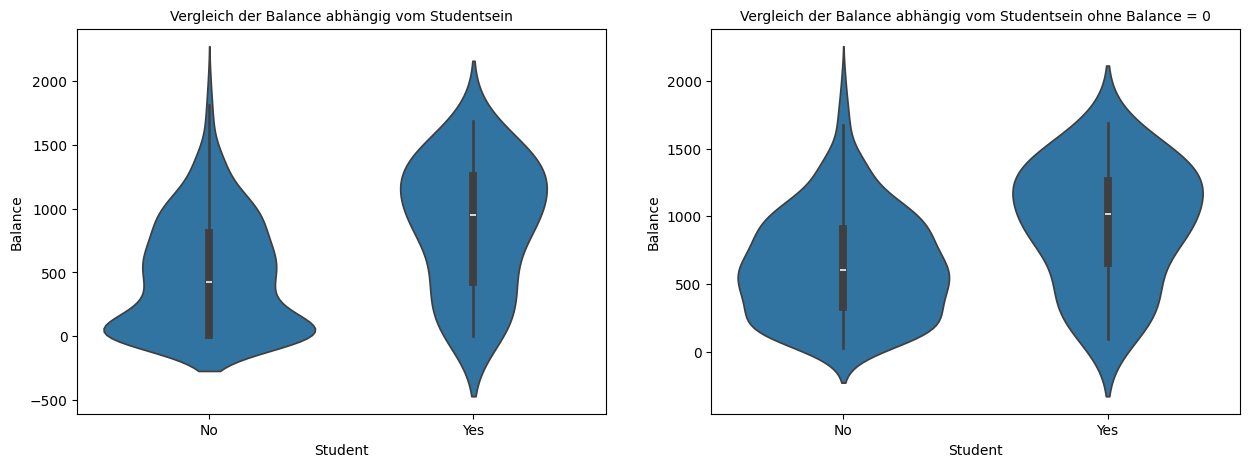

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.violinplot(x=data_clean["Student"],y=data_clean["Balance"])
plt.title("Vergleich der Balance abhängig vom Studentsein",fontsize=10)

plt.subplot(1,2,2)
sns.violinplot(x=datac_balance["Student"],y=datac_balance["Balance"])
plt.title("Vergleich der Balance abhängig vom Studentsein ohne Balance = 0",fontsize=10)
plt.show()

In [20]:
# ohne Balance = 0
data_stud_yes = datac_balance[datac_balance['Student'] == 'Yes']
data_stud_no = datac_balance[datac_balance['Student'] == 'No']
print(f'Studenten: Mittel {data_stud_yes['Balance'].mean()}; Median {data_stud_yes['Balance'].median()}')
print(f'Nicht    : Mittel {data_stud_no['Balance'].mean()}; Median {data_stud_no['Balance'].median()}')

Studenten: Mittel 947.3513513513514; Median 1020.0
Nicht    : Mittel 642.7881040892194; Median 602.0


## 6

- Student ist wahrscheinlich signifikant
- Geschlecht eher nicht
- Limit auch